# preprocessing

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime 

In [2]:
admission = pd.read_csv('admission.csv',index_col=0)

In [3]:
admission['DIAGNOSIS'].value_counts()

NEWBORN                                                                                      7823
PNEUMONIA                                                                                    1566
SEPSIS                                                                                       1184
CONGESTIVE HEART FAILURE                                                                      928
CORONARY ARTERY DISEASE                                                                       840
                                                                                             ... 
LOWER GASTROINTESTINAL BLEED;LUNG CANCER                                                        1
AORTIC VALVE DISORDER\AORTIC VALVE REPLACEMENT POSSIBLE CORONARY ARTERY BYPASS GRAFT /SDA       1
SEVERE AS\ BENTAL PROCEDURE W/ ? HOMOGRAFT/SDA                                                  1
ANEMIA/THROMBOCYTOPNEIA/FEVER                                                                   1
PANCREATITIS;PSEUDOC

In [4]:
admission.dropna(subset = ['DIAGNOSIS'])

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,58594,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,ENGL,NOT SPECIFIED,SINGLE,WHITE,2131-03-30 19:44:00,2131-03-30 22:41:00,TRAUMA,0,1
58972,58595,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,2151-03-06 09:10:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,2151-03-05 17:23:00,2151-03-05 21:06:00,SAH,1,1
58973,58596,98805,122631,2200-09-12 07:15:00,2200-09-20 12:08:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Private,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,RENAL CANCER/SDA,0,1
58974,58597,98813,170407,2128-11-11 02:29:00,2128-12-22 13:11:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,ENGL,CATHOLIC,MARRIED,WHITE,2128-11-10 23:48:00,2128-11-11 03:16:00,S/P FALL,0,0


In [5]:
cvd_list = ['Abnormal heart rhythms', 'arrhythmias', 'Aorta', 'Marfan syndrome','Congenital heart disease','Coronary artery','arteries', 'Deep vein thrombosis','pulmonary embolism','Heart attack','Heart failure', 'Heart muscle', 'cardiomyopathy', 'Heart valve','Pericardial', 'Peripheral vascular','Rheumatic heart','Stroke', 'vasulcar', 'blood vessel']
cvd_upper = [str.upper(item) for item in cvd_list] 

In [6]:
index_cvd = admission['DIAGNOSIS'].str.contains('ABNORMAL HEART RHYTHMS')
for item in cvd_upper:
    index_temp = admission['DIAGNOSIS'].str.contains(item)
    index_cvd = index_cvd | index_temp

In [7]:
sum(index_cvd) 

6766

In [8]:
admission_cvd = admission[index_cvd]

In [9]:
len(np.unique(admission_cvd['SUBJECT_ID']))

6379

# time processing

In [10]:
admission_cvd['ADMITTIME'].min() 

'2100-07-11 06:15:00'

In [11]:
admission_cvd['ADMITTIME'].max() 

'2209-07-14 21:35:00'

In [12]:
admission_cvd['ADMITTIME'].value_counts() 

2109-04-22 07:15:00    2
2169-06-07 08:00:00    2
2162-06-21 07:15:00    2
2101-09-05 07:15:00    2
2157-05-31 07:15:00    2
                      ..
2168-09-29 15:21:00    1
2190-07-21 19:38:00    1
2179-05-05 17:57:00    1
2189-12-21 07:15:00    1
2121-07-29 20:14:00    1
Name: ADMITTIME, Length: 6739, dtype: int64

In [13]:
admission_cvd['ADMITTIME'] = pd.to_datetime(admission_cvd['ADMITTIME']) 

In [14]:
admission_cvd['DISCHTIME'] = pd.to_datetime(admission_cvd['DISCHTIME']) 

In [15]:
admission_cvd['ADMI_DAYS'] = admission_cvd['ADMITTIME'] - admission_cvd['ADMITTIME'].min() 
admission_cvd['DIS_DAYS'] = admission_cvd['DISCHTIME'] - admission_cvd['DISCHTIME'].min() 

In [16]:
admission_cvd['ADMI_DAYS'] = [item.days for item in admission_cvd['ADMI_DAYS']]

In [17]:
admission_cvd['DIS_DAYS'] = [item.days for item in admission_cvd['DIS_DAYS']]

In [18]:
admission_cvd.columns

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS',
       'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA', 'ADMI_DAYS',
       'DIS_DAYS'],
      dtype='object')

In [19]:
admission_cvd_used = admission_cvd[['SUBJECT_ID', 'HADM_ID',
       'ADMISSION_TYPE','DIAGNOSIS', 'ADMI_DAYS','DIS_DAYS']]

In [20]:
admission_cvd_used['SPEND_TIME'] = admission_cvd_used['DIS_DAYS'] - admission_cvd_used['ADMI_DAYS'] 

In [21]:
admission_cvd_used.to_csv('admission_cvd.csv')

In [22]:
admission_cvd_used

,SUBJECT_ID,HADM_ID,ADMISSION_TYPE,DIAGNOSIS,ADMI_DAYS,DIS_DAYS,SPEND_TIME
1,23,152223,ELECTIVE,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,19412,19413,1
7,28,162569,ELECTIVE,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,28176,28177,1
14,35,166707,ELECTIVE,AORTIC VALVE DISEASE\CORONARY ARTERY BYPASS GR...,7884,7889,5
15,36,182104,EMERGENCY,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,11250,11253,3
18,37,188670,EMERGENCY,CONGESTIVE HEART FAILURE,30356,30357,1
...,...,...,...,...,...,...,...
58913,98634,131717,EMERGENCY,CORONARY ARTERY DISEASE,13365,13366,1
58915,98639,167385,ELECTIVE,CONGESTIVE HEART FAILURE\Transcatheter Aortic ...,6980,6984,4
58940,98714,171885,EMERGENCY,CORONARY ARTERY DISEASE\RIGHT CORONARY ARTERY ...,1585,1583,-2
58944,98733,152232,EMERGENCY,CORONARY ARTERY DISEASE,819,822,3


# second part 

In [23]:
admission_cvd_used = pd.read_csv('./admission_cvd.csv', index_col=0)  

In [24]:
admission_cvd_used = pd.get_dummies(admission_cvd_used, columns=['ADMISSION_TYPE'],drop_first=True)

# encoding result 

In [25]:
%store -r embeddings

In [26]:
for i in range(len(cvd_upper)):
    name = str(i)
    admission_cvd_used[name] = admission_cvd_used['DIAGNOSIS'].str.contains(cvd_upper[i])

In [27]:
data_embeddings = np.zeros([len(admission_cvd_used),len(cvd_upper)])
i = 0
for idx in admission_cvd_used.index:
    for j in range(len(cvd_upper)):
        if admission_cvd_used[str(j)][idx]:
            data_embeddings[i] += embeddings[str(j)]
    i = i+1

In [28]:
df_embeddings = pd.DataFrame(data=data_embeddings,index=admission_cvd_used.index) 

In [29]:
index = admission_cvd_used.columns 
admission_cvd_used = pd.concat([admission_cvd_used.loc[:,['SUBJECT_ID', 'HADM_ID', 'DIAGNOSIS', 'ADMI_DAYS', 'DIS_DAYS',
       'SPEND_TIME', 'ADMISSION_TYPE_EMERGENCY', 'ADMISSION_TYPE_URGENT']], df_embeddings],axis=1)  
admission_cvd_used.columns = index

In [30]:
admission_cvd_used.loc[1,:]

SUBJECT_ID                                                                 23
HADM_ID                                                                152223
DIAGNOSIS                   CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...
ADMI_DAYS                                                               19412
DIS_DAYS                                                                19413
SPEND_TIME                                                                  1
ADMISSION_TYPE_EMERGENCY                                                    0
ADMISSION_TYPE_URGENT                                                       0
0                                                                   0.0218092
1                                                                  -0.0209848
2                                                                -0.000340765
3                                                                  -0.0216808
4                                                               

In [31]:
subject_list = np.unique(admission_cvd_used['SUBJECT_ID'])

In [32]:
admission_cvd_used['ADMI_DAYS']  = admission_cvd_used['ADMI_DAYS'] // 1000

# vector of people

In [33]:
admission_cvd_cal = admission_cvd_used[['SUBJECT_ID', 'ADMI_DAYS',
       'SPEND_TIME', 'ADMISSION_TYPE_EMERGENCY', 'ADMISSION_TYPE_URGENT', '0',
       '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19']]

In [34]:
%store admission_cvd_cal

Stored 'admission_cvd_cal' (DataFrame)


In [34]:
df_test = admission_cvd_cal[admission_cvd_cal['SUBJECT_ID']==19059]
df_test = df_test.set_index('SUBJECT_ID')
a = df_test.values.reshape(-1, 1)

In [35]:
df_b = admission_cvd_cal[admission_cvd_cal['SUBJECT_ID']==97441]
df_b = df_b.set_index('SUBJECT_ID')
b = df_b.values

# compute distance

In [36]:
from dtw import dtw

In [37]:
def vec_reshape(id):
    df_test = admission_cvd_cal[admission_cvd_cal['SUBJECT_ID']==id]
    df_test = df_test.set_index('SUBJECT_ID')
    x = df_test.values.reshape(-1, 1)
    return x

In [38]:
def cal_dist(x, y):
    manhattan_distance = lambda x, y: np.abs(x - y)
    d, cost_matrix, acc_cost_matrix, path = dtw(x, y, dist=manhattan_distance)
    return d 

In [39]:
index = admission_cvd_cal['SUBJECT_ID'].value_counts().values >1 

In [40]:
more_than_one = admission_cvd_cal['SUBJECT_ID'][:sum(index)].values 

In [41]:
multi_coordinate = []
for id in subject_list:
    multi_coordinate.append(vec_reshape(id))

In [42]:
distance_matrix_sample = np.zeros((len(subject_list)//10, len(subject_list)//10))

# sample distance matrix 

In [27]:
for i in range(len(subject_list)//10):
    for j in range(i, len(subject_list)//10):
        distance_matrix_sample[i,j] = cal_dist(multi_coordinate[i],multi_coordinate[j])
        distance_matrix_sample[j,i] = distance_matrix_sample[i,j]
    print ('remaining:',len(subject_list)//10-i)

remaining: 637
remaining: 636
remaining: 635
remaining: 634
remaining: 633
remaining: 632
remaining: 631
remaining: 630
remaining: 629
remaining: 628
remaining: 627
remaining: 626
remaining: 625
remaining: 624
remaining: 623
remaining: 622
remaining: 621
remaining: 620
remaining: 619
remaining: 618
remaining: 617
remaining: 616
remaining: 615
remaining: 614
remaining: 613
remaining: 612
remaining: 611
remaining: 610
remaining: 609
remaining: 608
remaining: 607
remaining: 606
remaining: 605
remaining: 604
remaining: 603
remaining: 602
remaining: 601
remaining: 600
remaining: 599
remaining: 598
remaining: 597
remaining: 596
remaining: 595
remaining: 594
remaining: 593
remaining: 592
remaining: 591
remaining: 590
remaining: 589
remaining: 588
remaining: 587
remaining: 586
remaining: 585
remaining: 584
remaining: 583
remaining: 582
remaining: 581
remaining: 580
remaining: 579
remaining: 578
remaining: 577
remaining: 576
remaining: 575
remaining: 574
remaining: 573
remaining: 572
remaining:

remaining: 88
remaining: 87
remaining: 86
remaining: 85
remaining: 84
remaining: 83
remaining: 82
remaining: 81
remaining: 80
remaining: 79
remaining: 78
remaining: 77
remaining: 76
remaining: 75
remaining: 74
remaining: 73
remaining: 72
remaining: 71
remaining: 70
remaining: 69
remaining: 68
remaining: 67
remaining: 66
remaining: 65
remaining: 64
remaining: 63
remaining: 62
remaining: 61
remaining: 60
remaining: 59
remaining: 58
remaining: 57
remaining: 56
remaining: 55
remaining: 54
remaining: 53
remaining: 52
remaining: 51
remaining: 50
remaining: 49
remaining: 48
remaining: 47
remaining: 46
remaining: 45
remaining: 44
remaining: 43
remaining: 42
remaining: 41
remaining: 40
remaining: 39
remaining: 38
remaining: 37
remaining: 36
remaining: 35
remaining: 34
remaining: 33
remaining: 32
remaining: 31
remaining: 30
remaining: 29
remaining: 28
remaining: 27
remaining: 26
remaining: 25
remaining: 24
remaining: 23
remaining: 22
remaining: 21
remaining: 20
remaining: 19
remaining: 18
remain

In [37]:
df_distance = pd.DataFrame(distance_matrix_sample) 

In [38]:
df_distance.to_csv('distance_sample.csv')

In [41]:
np.shape(distance_matrix_sample) 

(637, 637)

# KNN

In [297]:
for j in range(len(subject_list)):
    distance_matrix[0,j] = cal_dist(subject_list[0],subject_list[j])

In [48]:
%store -r id_list

In [52]:
dic_distance = dict()
for i in range(6379):
    dic_distance[id_list[i]] = [id_list[idx] for idx in np.argsort(distance_matrix_sample[i//10-1])[:5]]
 

In [53]:
%store dic_distance

Stored 'dic_distance' (dict)


In [43]:
np.argsort(distance_matrix_sample[0])[:5]

array([  0, 458, 415, 373, 354])

In [311]:
subject_list[0]

13

# DTW

217.0


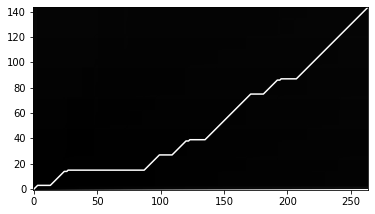

In [258]:
manhattan_distance = lambda x, y: np.abs(x - y)
d, cost_matrix, acc_cost_matrix, path = dtw(x, y, dist=manhattan_distance)
print(d)
plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.show()
# patient 19059 & patient 97441

In [35]:
admission = admission.set_index('HADM_ID')

In [36]:
%store admission

Stored 'admission' (DataFrame)
